Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


saved image as dot_BG_8px_10%_2021-06-25.jpg


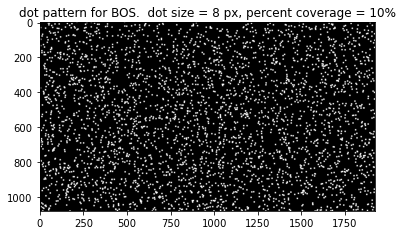

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 13 13:27:57 2016
@author: jack
DESCRIPTION
======
This script generates dot patterns to use as backgrounds for BOS
INSTRUCTIONS TO USE
======
The user can select the dimensions of the output image, the size of the dots,
and the percent of the area that us covered with white dots by editing those
variables under the 'USER OPTIONS' section.
Note that due to the way the size of the dots is changed, the script creates
square dots.
After displaying the image, the script will then offer the user the option to
save the image.
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.misc
import tkinter.messagebox
import time
from matplotlib import pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from scipy.signal import kaiserord, lfilter, firwin, freqz
import imageio


#------------------------------------------------------------
# USER OPTIONS
# select dimensions
width=1920
height=1080
# select dot size in pixels
dotSize = 8
# select percent of the space to have dots
percentCoverage = 10


#------------------------------------------------------------
# create random dot image with a dot size of 1
y = np.random.rand(height,width)
dotArea = dotSize**2.
pc = percentCoverage/dotArea
shift = (pc-50.)/100.
Y = np.around(y+shift)


#------------------------------------------------------------
# use dialate function to change size of dots
kernel = np.ones((dotSize,dotSize),np.uint8)
Ye = cv2.dilate(Y,kernel,iterations = 1)
fig2=plt.figure()
plt.imshow(Ye, cmap='gray')
plt.title('dot pattern for BOS.  dot size = '+str(dotSize)+' px, percent coverage = '+str(percentCoverage)+'%')


#------------------------------------------------------------
# ask user if they would like to save files
saveChoice = tkinter.messagebox.askyesno('Save results?','Would you like to save the background?')
if saveChoice:
    outputFilename = 'dot_BG_'+ str(dotSize) + 'px_'+str(percentCoverage) +'%_' + time.strftime("%Y-%m-%d") +'.jpg'
    imageio.imwrite(outputFilename, Ye)
    print('saved image as ' + outputFilename)
else:
    print('You have chosen not to save the image')